In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')

# Lendo os dados e explorando o Dataset

In [54]:
dados = pd.read_csv("house_data.csv")
dados.shape

(10692, 13)

In [55]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [56]:
colunas = ['cidade', 'area', 'quartos', 'banheiro', 'vagas_garagem', 
           'andar','animal', 'mobilhado', 'condominio', 'aluguel', 
           'iptu', 'taxa_incendio', 'total']

In [57]:
dados.columns = colunas
dados.head()

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu,taxa_incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [58]:
dados.cidade.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [59]:
dados = dados.drop(columns=['taxa_incendio', 'total'])
dados.head()

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [60]:
dados.isnull().sum().sort_values(ascending=True)

cidade           0
area             0
quartos          0
banheiro         0
vagas_garagem    0
andar            0
animal           0
mobilhado        0
condominio       0
aluguel          0
iptu             0
dtype: int64

In [61]:
dados.nunique()

cidade              5
area              517
quartos            11
banheiro           10
vagas_garagem      11
andar              35
animal              2
mobilhado           2
condominio       1679
aluguel          1195
iptu             1243
dtype: int64

In [62]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cidade         10692 non-null  object
 1   area           10692 non-null  int64 
 2   quartos        10692 non-null  int64 
 3   banheiro       10692 non-null  int64 
 4   vagas_garagem  10692 non-null  int64 
 5   andar          10692 non-null  object
 6   animal         10692 non-null  object
 7   mobilhado      10692 non-null  object
 8   condominio     10692 non-null  int64 
 9   aluguel        10692 non-null  int64 
 10  iptu           10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [63]:
dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# Exploração Analitica (EDA)

In [64]:
colunas_categoricas = dados.columns[dados.dtypes == object]
colunas_numericas = dados.columns[dados.dtypes != object]

In [65]:
colunas_categoricas, colunas_numericas

(Index(['cidade', 'andar', 'animal', 'mobilhado'], dtype='object'),
 Index(['area', 'quartos', 'banheiro', 'vagas_garagem', 'condominio', 'aluguel',
        'iptu'],
       dtype='object'))

In [66]:
dados.cidade.value_counts(normalize=True)*100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: cidade, dtype: float64

In [67]:
#iterando nas colunas categoricas
for col in colunas_categoricas:
    
    #analise coluna a coluna
    analise = dados[col].value_counts(normalize=True)*100
    
    #mostrando na tela as analises coluna a coluna
    print("Coluna: {} \nAnalise:\n{} \n".format(col, analise))

Coluna: cidade 
Analise:
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: cidade, dtype: float64 

Coluna: andar 
Analise:
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: andar, dtype: float64 

Coluna: animal 
Analise:
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

Coluna: mobilhado 
Analise:
not furnished    75.62663

## Correção nos dados

In [68]:
# ajustando o andar
dados.loc[dados.andar=='301']

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [69]:
dados.iloc[2562, 5]='30'

In [70]:
dados.loc[dados.andar=='30']

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
2562,Belo Horizonte,80,3,2,2,30,acept,not furnished,750,2600,164


In [71]:
#ajustar "-"
dados.andar = dados.andar.apply(lambda registro: 0 if registro == '-' else registro)
dados.andar = pd.to_numeric(dados.andar)

In [72]:
dados.tail()

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [73]:
dados.andar.dtypes

dtype('int64')

In [74]:
dados.andar.value_counts(normalize=True)

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: andar, dtype: float64

## Visualização Gráfica

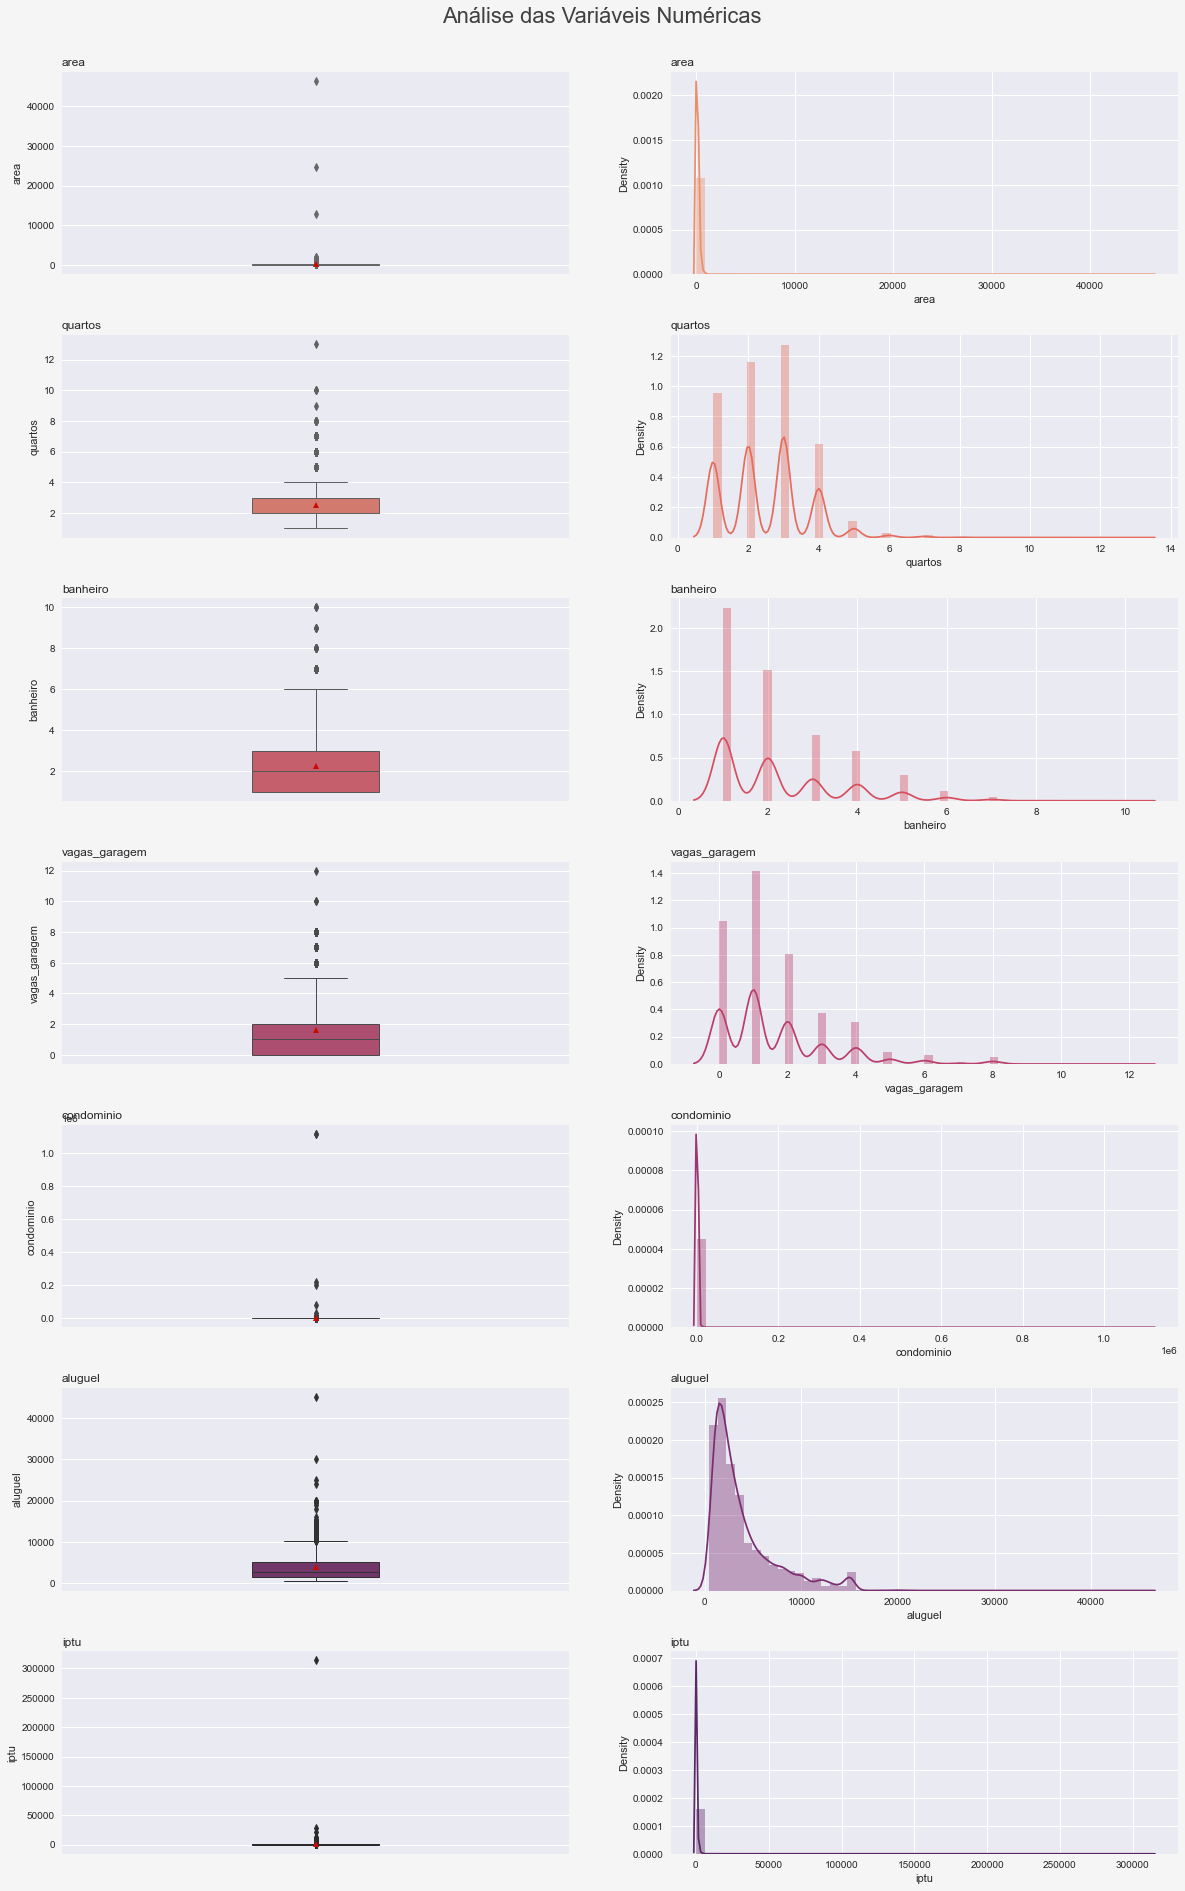

In [75]:
#Tamanho 
figura, eixo = plt.subplots(figsize = (20,30))

#cor de fundp
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

#paleta de cores
paleta_cores=sns.color_palette("flare", len(colunas_numericas)*2)

#Titulo
plt.suptitle("Análise das Variáveis Numéricas", fontsize=22, color='#404040')

#Estrutura
linhas = 7 #todas infos numericas
colunas = 2 # boxplot - distplot
posicao = 1 # posicao inicial do grid

#loop nos graficos
for col in colunas_numericas:
    
    #plot do grid -- boxplot
    plt.subplot(linhas, colunas, posicao)
    
    #titulo
    plt.title(f"{col}", loc="left", fontweight=200)
    
    #plot
    sns.boxplot(data=dados, y=col, showmeans=True, saturation=0.75,
                linewidth=1, color=paleta_cores[posicao], width=0.25)
    
    #mudar
    posicao+=1
    
    #plot do grid -- distplot
    plt.subplot(linhas, colunas, posicao)
    
    #titulo
    plt.title(f"{col}", loc="left", fontweight=200)
    
    #plot
    sns.distplot(dados[col], color=paleta_cores[posicao-1])
    
    #mudar
    posicao+=1
    
#ajuste no grid
plt.subplots_adjust(top=0.95, hspace=0.3)

# Analisando os Outliers

In [76]:
#encontrado os outliers

dados.loc[dados.area <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [77]:
dados.loc[dados.condominio <= 10000]['condominio'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: condominio, dtype: float64

In [78]:
dados.condominio.sort_values(ascending=False)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
          ...   
5818           0
5821           0
5832           0
5845           0
10691          0
Name: condominio, Length: 10692, dtype: int64

In [79]:
dados.iloc[255]

cidade           Belo Horizonte
area                        155
quartos                       1
banheiro                      4
vagas_garagem                 0
andar                         4
animal                not acept
mobilhado         not furnished
condominio              1117000
aluguel                    2790
iptu                         64
Name: 255, dtype: object

In [80]:
dados.aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: aluguel, dtype: float64

In [81]:
dados.loc[dados.aluguel <= 40000]['aluguel'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: aluguel, dtype: float64

In [82]:
dados.iptu.sort_values(ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: iptu, dtype: int64

In [83]:
dados.iloc[6645]

cidade               São Paulo
area                        42
quartos                      1
banheiro                     2
vagas_garagem                1
andar                        6
animal               not acept
mobilhado        not furnished
condominio                 690
aluguel                   2500
iptu                    313700
Name: 6645, dtype: object

# Engenharia de Features

### Ajuste das colunas categoricas

In [84]:
trocar_animal = {
                    'acept': 1,
                    'not acept': 0
                }

trocar_mobilhado = {
                        'furnished': 1,
                        'not furnished': 0
                    }

dados.animal = dados.animal.map(trocar_animal)
dados.mobilhado = dados.mobilhado.map(trocar_mobilhado)
dados.head()

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25


### Filtrar para a cidade de São Paulo

In [85]:
sp = dados.query("cidade == 'São Paulo'")
sp.head()

,cidade,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [86]:
sp.animal.value_counts()

1    4482
0    1405
Name: animal, dtype: int64

In [87]:
sp.drop("cidade" ,axis=1, inplace=True)
sp.head()

,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735


### Separação dos dados em Features e Target

In [88]:
#separação
features = sp.drop('aluguel', axis=1)
target = sp.aluguel

#verificando o formato dos dados
features.shape, target.shape

((5887, 9), (5887,))

In [89]:
features.head()

,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,iptu
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [90]:
target.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: aluguel, dtype: int64

### Correlações

In [91]:
sp.corr()

,area,quartos,banheiro,vagas_garagem,andar,animal,mobilhado,condominio,aluguel,iptu
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
quartos,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
banheiro,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
vagas_garagem,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
andar,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
mobilhado,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
condominio,0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
aluguel,0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
iptu,0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


In [92]:
# Yellowbrick
from yellowbrick.features import Rank2D

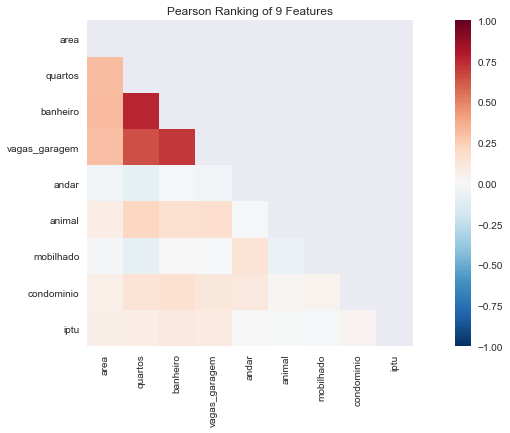

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

In [93]:
#metodo utilizado
correlacao = Rank2D(algoritmo='pearson')

#fit da função
correlacao.fit(features, target)
correlacao.transform(features)
correlacao.show()

### Separar os dados em treino e teste


In [94]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(
features, target, test_size=0.2, random_state=10
)

In [95]:
print(f'Dados de Treino: {x_treino.shape[0]}')
print(f'Dados de Teste: {x_teste.shape[0]}')

Dados de Treino: 4709
Dados de Teste: 1178


### Features mais relevantes

In [96]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest 

# Seleção de Features
def selecao_features(x_treino, y_treino):
    
    selecao = SelectKBest(score_func = mutual_info_regression, k='all')
    
    #fit do aprendizado
    selecao.fit(x_treino, y_treino)
    
    return selecao
    
scores = selecao_features(x_treino, y_treino)

In [97]:
for posicao, score in enumerate(scores.scores_):
    print(f' {x_treino.columns[posicao]}: {score}')

 area: 0.07097324442865105
 quartos: 0.26259111253263345
 banheiro: 0.31149847375302464
 vagas_garagem: 0.24065326457289116
 andar: 0.03792338451256816
 animal: 0.037197500999125666
 mobilhado: 0.039795381390918205
 condominio: 0.06527410368024134
 iptu: 0.1747691175366839


### Construção do Modelo

In [98]:
# modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

# instanciando o modelo
model = RandomForestRegressor(max_depth=5)

model.fit(x_treino.values, y_treino.values)

RandomForestRegressor(max_depth=5)

### Avialiar a performance do modelo

In [99]:
previsao = model.predict(x_teste)
previsao

array([1562.36315083, 8850.71036108, 7723.79876483, ..., 2046.07695435,
       6439.83884103, 3139.72642935])

In [100]:
# funcao para avaliar o modelo
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [101]:
print(f"RMSE: {sqrt(mean_squared_error(y_teste, previsao))}")
print(f"Score: {r2_score(y_teste, previsao)}")

RMSE: 2448.686828132077
Score: 0.5660315385809309


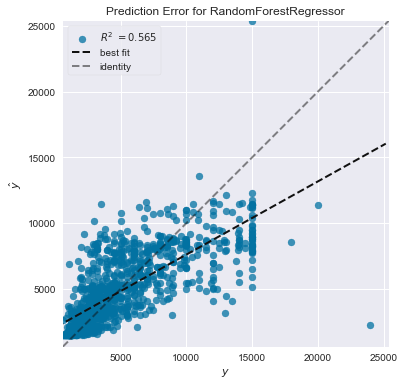

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [102]:
# Avaliando com Yellowbrick
from yellowbrick.regressor import PredictionError

#instancia do modelo
model_brick = RandomForestRegressor(max_depth=5)
erro_model = PredictionError(model_brick)

#fit do modelo
erro_model.fit(x_treino, y_treino)
erro_model.score(x_teste, y_teste)
erro_model.show()


### Exportando o Modelo

In [103]:
import joblib

joblib.dump(model, 'modelo_randomforest_v100.pkl')

['modelo_randomforest_v100.pkl']

In [104]:
import sklearn
sklearn.__version__

'1.1.2'